#Why ML Models Can't Handle Raw Categorical Data

##Step 1: Understanding Categorical Data

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample data with categorical feature
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red', 'Blue', 'Red', 'Green'],
    'Price': [10, 20, 15, 25, 30, 20, 15, 22]
})

# Display the dataset
print("Original Dataset:")
print(data)
print("\nData Types:")
print(data.dtypes)

Original Dataset:
   Color  Price
0    Red     10
1  Green     20
2   Blue     15
3  Green     25
4    Red     30
5   Blue     20
6    Red     15
7  Green     22

Data Types:
Color    object
Price     int64
dtype: object


##Step 2: Seeing the Problem Firsthand

In [ ]:
# Attempt to use raw categorical data in a machine learning model
X = data[['Color']]  # Feature (categorical)
y = data['Price']    # Target variable

# Try to fit a linear regression model with raw categorical data
try:
    model = LinearRegression()
    model.fit(X, y)
    print("Model fitted successfully (unlikely to happen with raw categorical data)")
except ValueError as e:
    print("\nError encountered:")
    print(e)
    print("\nThis demonstrates why we can't feed raw categorical data to ML algorithms")


Error encountered:
could not convert string to float: 'Red'

This demonstrates why we can't feed raw categorical data to ML algorithms


##Step 3: Why This Impacts Model Learning


In [ ]:
# Visual demonstration of why categorical data needs transformation
print("\nCategorical data lacks numerical properties needed for mathematics:")
print("- No natural ordering (Is 'Red' < 'Green'? This makes no sense)")
print("- No arithmetic operations ('Red' + 'Blue' has no mathematical meaning)")
print("- No distance metrics (How far is 'Red' from 'Green'?)")

# #added during screencast
# Showing mathematical operations with numerical vs. categorical data
numerical_example = np.array([1, 2, 3, 4, 5])
print("\nArithmetic with numerical data:")
print(f"Mean: {numerical_example.mean()}")
print(f"Sum: {numerical_example.sum()}")

categorical_example = np.array(['Red', 'Green', 'Blue'])
print("\nAttempting operations on categorical data:")
try:
    print(f"Mean: {categorical_example.mean()}")
except TypeError as e:
    print(f"Mean calculation error: {e}")



Categorical data lacks numerical properties needed for mathematics:
- No natural ordering (Is 'Red' < 'Green'? This makes no sense)
- No arithmetic operations ('Red' + 'Blue' has no mathematical meaning)
- No distance metrics (How far is 'Red' from 'Green'?)

Arithmetic with numerical data:
Mean: 3.0
Sum: 15

Attempting operations on categorical data:
Mean calculation error: the resolved dtypes are not compatible with add.reduce. Resolved (dtype('<U5'), dtype('<U5'), dtype('<U10'))


##Step 4: Conceptual Visualization of Categorical Data Issues


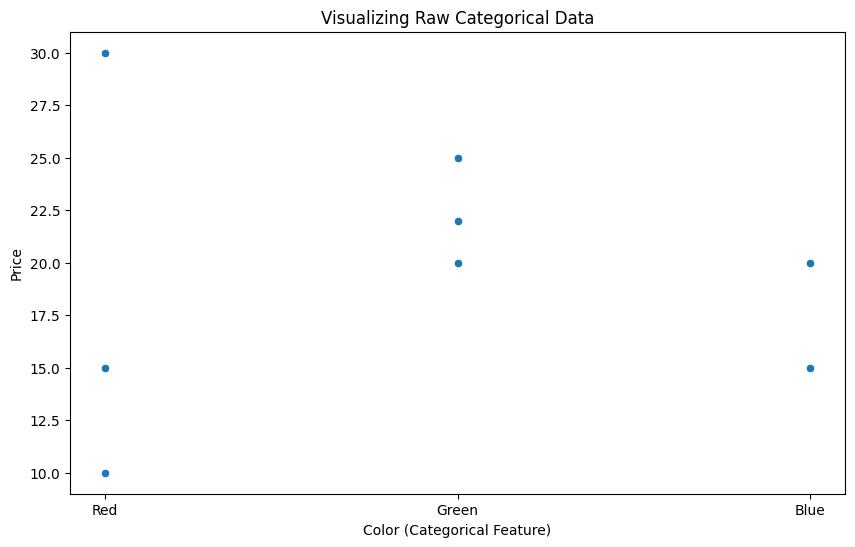

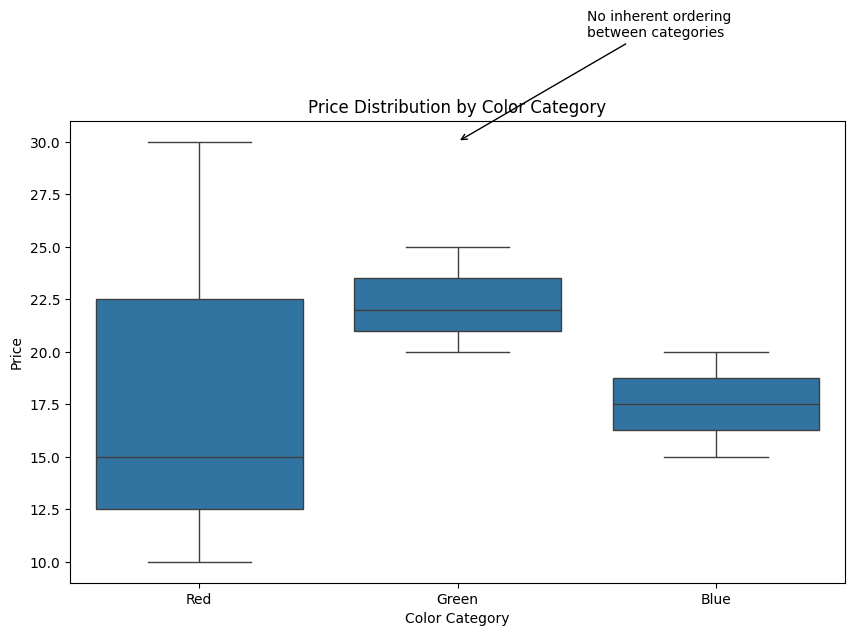

In [ ]:
# Visualize the relationship between categorical data and price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Color', y='Price')
plt.title('Visualizing Raw Categorical Data')
plt.xlabel('Color (Categorical Feature)')
plt.ylabel('Price')
plt.show()

# #added during screencast
# Add a more detailed explanation with visualization
plt.figure(figsize=(10, 6))
ax = sns.boxplot(data=data, x='Color', y='Price')
plt.title('Price Distribution by Color Category')
plt.xlabel('Color Category')
plt.ylabel('Price')

# Add annotations to highlight the issue
plt.annotate('No inherent ordering\nbetween categories',
             xy=(1, data['Price'].max()),
             xytext=(1.5, data['Price'].max() + 5),
             arrowprops=dict(arrowstyle='->'))
plt.show()
# End of added section

#Types of Categorical Variables and How to Encode Them

##Step 1: Apply One-Hot Encoding

In [ ]:
# Import the OneHotEncoder class
from sklearn.preprocessing import OneHotEncoder

# Initialize and apply the encoder
encoder = OneHotEncoder(sparse_output=False)
encoded_vars = encoder.fit_transform(data[['Color']])
df_encoded = pd.DataFrame(encoded_vars, columns=encoder.get_feature_names_out(['Color']))

# Display the encoded data
print("\nOne-Hot Encoded Data:")
print(df_encoded)

# Add the encoded columns back to original data for comparison
data_with_onehot = data.copy()
data_with_onehot = pd.concat([data_with_onehot, df_encoded], axis=1)
print("\nOriginal data with One-Hot encoded features:")
print(data_with_onehot)

print("\nWith One-Hot Encoding, each category gets its own dimension, or column, effectively translating the vibrant spectrum into numbers without losing richness.")



One-Hot Encoded Data:
   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         0.0          1.0        0.0
2         1.0          0.0        0.0
3         0.0          1.0        0.0
4         0.0          0.0        1.0
5         1.0          0.0        0.0
6         0.0          0.0        1.0
7         0.0          1.0        0.0

Original data with One-Hot encoded features:
   Color  Price  Color_Blue  Color_Green  Color_Red
0    Red     10         0.0          0.0        1.0
1  Green     20         0.0          1.0        0.0
2   Blue     15         1.0          0.0        0.0
3  Green     25         0.0          1.0        0.0
4    Red     30         0.0          0.0        1.0
5   Blue     20         1.0          0.0        0.0
6    Red     15         0.0          0.0        1.0
7  Green     22         0.0          1.0        0.0

With One-Hot Encoding, each category gets its own dimension, or column, effectively translating the vibrant spectrum int

##Step 2: Encoding Ordinal Variables with Label Encoding


Corrected Label Encoding for Ordinal Variables:
     Education  Education_Encoded
0  High School                0.0
1     Bachelor                1.0
2       Master                2.0

Dataset with Corrected Label-Encoded Education:
   Color  Price    Education  Education_Encoded
0    Red     10  High School                0.0
1  Green     20     Bachelor                1.0
2   Blue     15       Master                2.0
3  Green     25     Bachelor                1.0
4    Red     30  High School                0.0
5   Blue     20       Master                2.0
6    Red     15  High School                0.0
7  Green     22     Bachelor                1.0

Here, Label Encoding retains the inherent order, creating a meaningful numerical representation of rankings or scales.


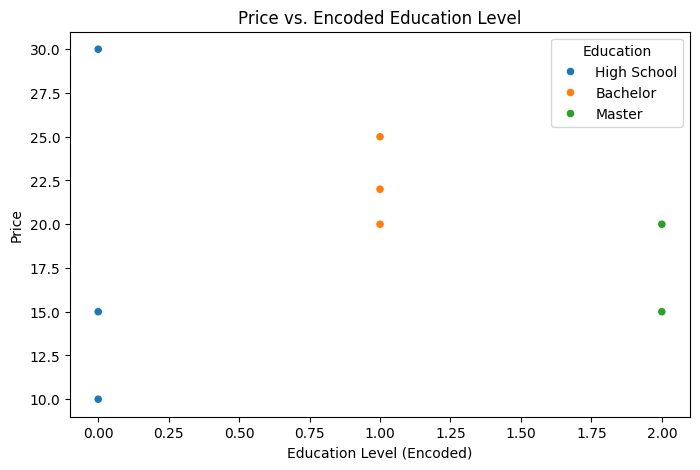

In [ ]:
# #added during screencast
# Import the OrdinalEncoder class
from sklearn.preprocessing import OrdinalEncoder

# Add an ordinal variable to our dataset
data['Education'] = ['High School', 'Bachelor', 'Master', 'Bachelor', 'High School',
                     'Master', 'High School', 'Bachelor']



# Define the order of categories
education_categories = ['High School', 'Bachelor', 'Master']

# Initialize and apply the ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[education_categories]) # Pass the categories
data['Education_Encoded'] = ordinal_encoder.fit_transform(data[['Education']])

# Display the corrected encoding results
print("\nCorrected Label Encoding for Ordinal Variables:")
print(data[['Education', 'Education_Encoded']].drop_duplicates())

# Show the complete dataset with the corrected encoding
print("\nDataset with Corrected Label-Encoded Education:")
print(data)

print("\nHere, Label Encoding retains the inherent order, creating a meaningful numerical representation of rankings or scales.")

# Optionally visualize the encoding
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Education_Encoded', y='Price', hue='Education')
plt.title('Price vs. Encoded Education Level')
plt.xlabel('Education Level (Encoded)')
plt.ylabel('Price')
plt.show()


# Label Encoding and Model Performance Comparison

## Step 1: Creating a Classification Dataset



==== ENCODING CATEGORICAL TARGET VARIABLES ====

Classification Dataset (with categorical target):
   Age  Income  Education Purchase_Category
0   25   45000          0       Electronics
1   30   55000          1          Clothing
2   45   90000          2            Luxury
3   60   75000          2              Home
4   35   60000          1       Electronics

Unique Purchase Categories: ['Electronics' 'Clothing' 'Luxury' 'Home' 'Food']
Category Distribution:
Purchase_Category
Electronics    3
Clothing       3
Luxury         3
Home           2
Food           1
Name: count, dtype: int64


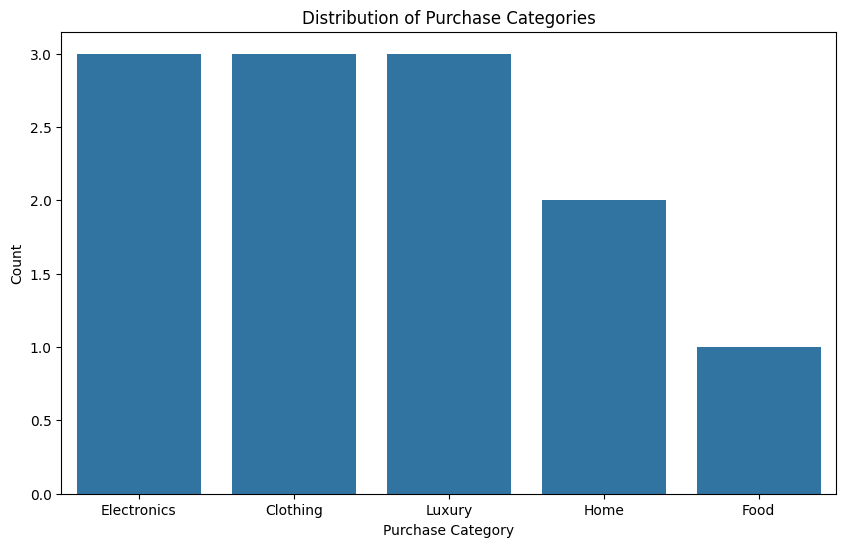

In [ ]:

print("\n\n==== ENCODING CATEGORICAL TARGET VARIABLES ====\n")

# Create a dataset with a categorical target variable
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample classification dataset
classification_data = pd.DataFrame({
    'Age': [25, 30, 45, 60, 35, 25, 30, 42, 55, 38, 41, 28],
    'Income': [45000, 55000, 90000, 75000, 60000, 48000, 52000, 85000, 70000, 65000, 82000, 51000],
    'Education': [0, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 0],  # Using education levels already encoded
    'Purchase_Category': ['Electronics', 'Clothing', 'Luxury', 'Home', 'Electronics',
                          'Food', 'Clothing', 'Luxury', 'Home', 'Electronics', 'Luxury', 'Clothing']
})

print("Classification Dataset (with categorical target):")
print(classification_data.head(5))

# Analyze the categorical target variable
print("\nUnique Purchase Categories:", classification_data['Purchase_Category'].unique())
print("Category Distribution:")
print(classification_data['Purchase_Category'].value_counts())

# Visualize the distribution of the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=classification_data, x='Purchase_Category')
plt.title('Distribution of Purchase Categories')
plt.xlabel('Purchase Category')
plt.ylabel('Count')
plt.show()


## Step 2: Encoding the Categorical Target



Dataset with Original and Encoded Target Variables:
  Purchase_Category  Purchase_Encoded
0       Electronics                 1
1          Clothing                 0
2            Luxury                 4
3              Home                 3
4       Electronics                 1
5              Food                 2
6          Clothing                 0
7            Luxury                 4

Category to Encoding Mapping:
Clothing --> 0
Electronics --> 1
Food --> 2
Home --> 3
Luxury --> 4


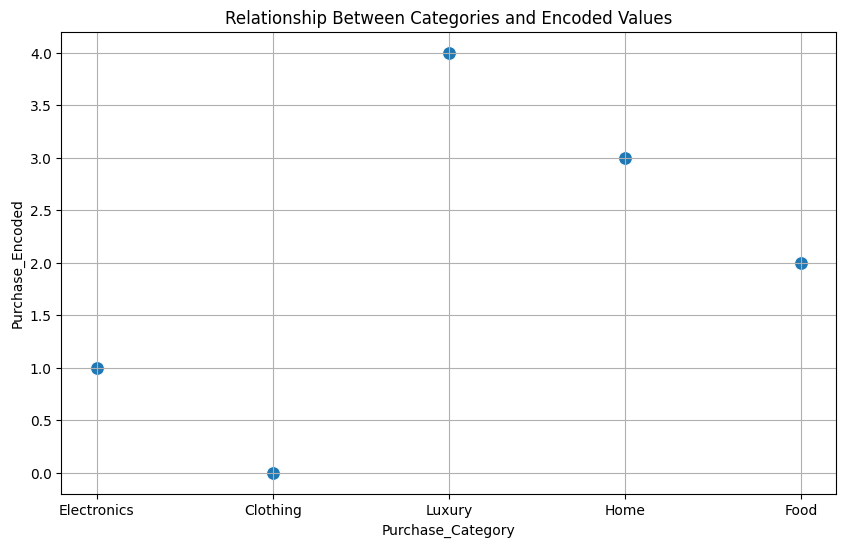

In [ ]:
# Initialize the LabelEncoder
target_encoder = LabelEncoder()

# Fit and transform the categorical target
classification_data['Purchase_Encoded'] = target_encoder.fit_transform(classification_data['Purchase_Category'])

# Display the dataset with both original and encoded targets
print("\nDataset with Original and Encoded Target Variables:")
print(classification_data[['Purchase_Category', 'Purchase_Encoded']].head(8))

# Show the mapping between categories and their encoded values
print("\nCategory to Encoding Mapping:")
for i, category in enumerate(target_encoder.classes_):
    print(f"{category} --> {i}")

# Visualize the relationship between categories and their encoded values
plt.figure(figsize=(10, 6))
sns.scatterplot(data=classification_data, x='Purchase_Category', y='Purchase_Encoded', s=100)
plt.title('Relationship Between Categories and Encoded Values')
plt.grid(True)
plt.show()

## Step 3: Training a Classification Model with Encoded Target


In [ ]:
# Select features and target for classification
X_features = classification_data[['Age', 'Income', 'Education']]
y_target = classification_data['Purchase_Encoded']  # Using the encoded target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.3, random_state=42)

print("\nTraining a classifier with encoded target variable...")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

print("\nClassifier trained successfully!")

# Evaluate the model performance with encoded targets
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
encoded_accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on encoded targets: {encoded_accuracy:.2f}")


Training a classifier with encoded target variable...
Training set: 8 samples
Testing set: 4 samples

Classifier trained successfully!

Accuracy on encoded targets: 0.50


## Step 4: Converting Predictions Back to Original Categories



Predicted vs. Actual Categories:
    Actual (Encoded)  Predicted (Encoded) Actual Category Predicted Category
10                 4                    4          Luxury             Luxury
9                  1                    1     Electronics        Electronics
0                  1                    2     Electronics               Food
8                  3                    1            Home        Electronics

Classification Report (Original Categories):
              precision    recall  f1-score   support

 Electronics       0.50      0.50      0.50         2
        Food       0.00      0.00      0.00         0
        Home       0.00      0.00      0.00         1
      Luxury       1.00      1.00      1.00         1

    accuracy                           0.50         4
   macro avg       0.38      0.38      0.38         4
weighted avg       0.50      0.50      0.50         4


Confusion Matrix:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

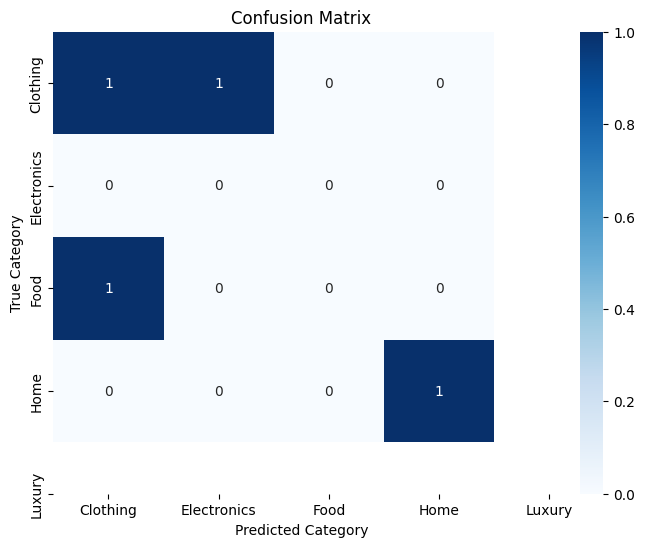

In [ ]:
# Convert numeric predictions back to category labels
y_pred_labels = target_encoder.inverse_transform(y_pred)
y_test_labels = target_encoder.inverse_transform(y_test)

print("\nPredicted vs. Actual Categories:")
results = pd.DataFrame({
    'Actual (Encoded)': y_test,
    'Predicted (Encoded)': y_pred,
    'Actual Category': y_test_labels,
    'Predicted Category': y_pred_labels
})
print(results.head(5))

# Detailed classification performance metrics
from sklearn.metrics import classification_report, confusion_matrix
print("\nClassification Report (Original Categories):")
print(classification_report(y_test_labels, y_pred_labels))

print("\nConfusion Matrix:")
conf_mat = confusion_matrix(y_test_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
           xticklabels=target_encoder.classes_,
           yticklabels=target_encoder.classes_)
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.title('Confusion Matrix')
plt.show()

## Step 5: Making New Predictions


In [ ]:

# Create sample data for prediction
sample_input = pd.DataFrame({
    'Age': [28, 50],
    'Income': [52000, 88000],
    'Education': [1, 2]
})

print("\nMaking predictions for new data:")
print(sample_input)

# Make predictions (returns encoded values)
sample_pred_encoded = classifier.predict(sample_input)
print("\nPredictions (encoded):", sample_pred_encoded)

# Convert encoded predictions back to original categories
sample_pred_category = target_encoder.inverse_transform(sample_pred_encoded)
print("Predictions (categories):", sample_pred_category)

# Create a nice formatted output
prediction_results = pd.DataFrame({
    'Age': sample_input['Age'],
    'Income': sample_input['Income'],
    'Education': sample_input['Education'],
    'Predicted Category': sample_pred_category
})
print("\nPrediction Results:")
print(prediction_results)

print("\nKey Takeaways for Encoding Categorical Target Variables:")
print("1. Use LabelEncoder to convert categorical targets to numerical form")
print("2. Train models using the encoded numerical target")
print("3. Convert predictions back to original categories using inverse_transform()")
print("4. Keep track of the encoding mapping for interpretation")
print("5. Remember that encoding doesn't add any ordinal relationship - it's just a numerical representation")
# End of added section


Making predictions for new data:
   Age  Income  Education
0   28   52000          1
1   50   88000          2

Predictions (encoded): [0 4]
Predictions (categories): ['Clothing' 'Luxury']

Prediction Results:
   Age  Income  Education Predicted Category
0   28   52000          1           Clothing
1   50   88000          2             Luxury

Key Takeaways for Encoding Categorical Target Variables:
1. Use LabelEncoder to convert categorical targets to numerical form
2. Train models using the encoded numerical target
3. Convert predictions back to original categories using inverse_transform()
4. Keep track of the encoding mapping for interpretation
5. Remember that encoding doesn't add any ordinal relationship - it's just a numerical representation
